## Object Detection 주요 Dataset

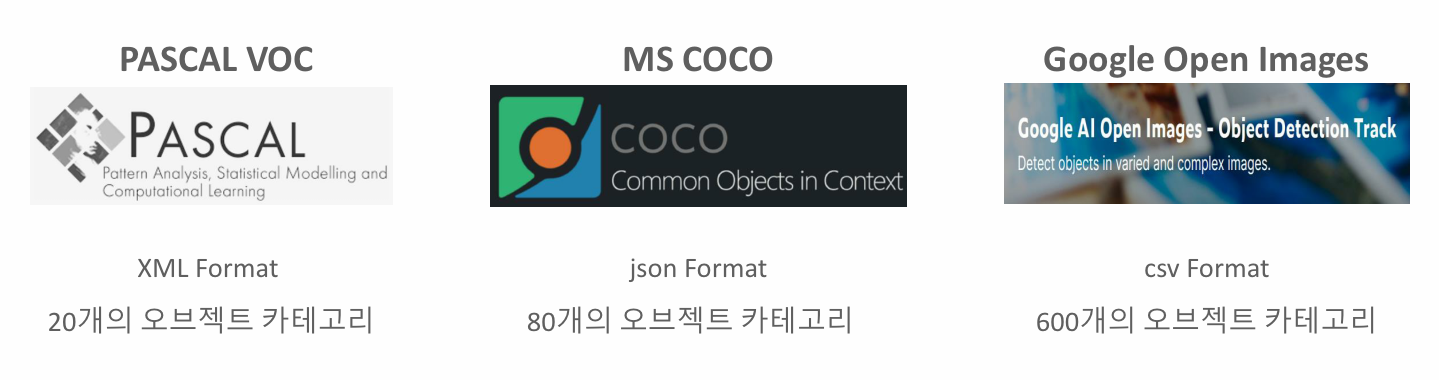

PASCAL VOC 2012 데이터 다운로드 받기 : (1.86GB)
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

http://host.robots.ox.ac.uk/pascal/VOC/voc2012

In [1]:
# Linux / Colab 환경
# !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# !tar -xvf VOCtrainval_11-May-2012.tar  

#### PASCAL VOC 2012 <br>
Person: person <br>
Animal: bird, cat, cow, dog, horse, sheep <br>
Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train <br>
Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor <br>

[1] Classification/Detection Competitions <br>
[2] Segmentation Competition <br>
[3] Action Classification Competition <br>
[4] ImageNet Large Scale Visual Recognition Competition

### Pascal VOC Dataset 
20 object classes:
- person
- bird, cat, cow, dog, horse, sheep
- aeroplane, bicycle, boat, bus, car, motorbike, train
- bottle, chair, dining table, potted plant, sofa, tv/monitor

- detection: classification + localizaiton 
    - classification Dataset: 클래스로 이름으로 된 폴더별로 이미지
    - localization Dataset:이미지 한장에 좌표값과 클래스
        - Annotation
           - json ,csv ,xml 파일
              - Image info : width, height, depth, name, pose 
              - 좌표값 4개 : xmin,ymin,xmax,ymax

#### JPEGImages 디렉토리에 있는 임의의 이미지 보기  (17,125개 이미지)

shape (375, 500, 3)


<Figure size 800x800 with 0 Axes>

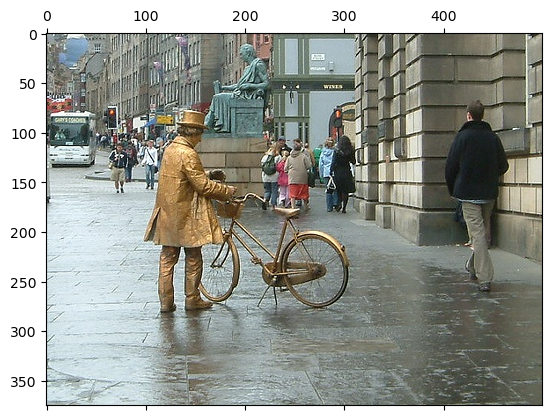

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('VOCdevkit/VOC2012/JPEGImages/2007_000793.jpg')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print('shape',img.shape)
plt.figure(figsize=(8,8))
plt.matshow(img_rgb);

#### Annotations 디렉토리에 있는 임의의 annotation 파일 보기

In [3]:
f = open('VOCdevkit/VOC2012/Annotations/2007_000793.xml')
line = f.readline()
while line:
    print(line,end='')
    line = f.readline()

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000793.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>289</xmin>
			<ymin>100</ymin>
			<xmax>316</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>241</xmin>
			<ymin>111</ymin>
			<xmax>270</xmax>
			<ymax>180</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>218</xmin>
			<ymin>107</ymin>
			<xmax>236</xmax>
			<ymax>178</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</

#### SegmentationObject 디렉토리에 있는 있는 임의의 maksing 이미지 보기 

(375, 500, 3)


<Figure size 800x800 with 0 Axes>

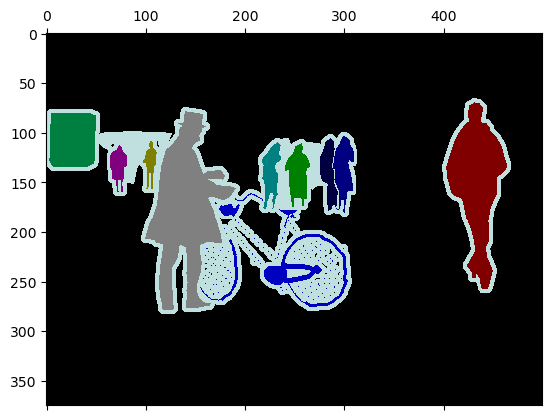

In [4]:
img = cv2.imread('VOCdevkit/VOC2012/SegmentationObject/2007_000793.png')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(figsize=(8,8))
plt.matshow(img)
plt.show()

#### Annotation xml 파일에 있는 요소들을 파싱하여 접근하기

In [5]:
import os
import random

VOC_ROOT_DIR ="VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

xml_files = os.listdir(ANNO_DIR)                       
print(xml_files[:5])
print(len(xml_files))  # 17125개

['2007_000027.xml', '2007_000032.xml', '2007_000033.xml', '2007_000039.xml', '2007_000042.xml']
17125


In [6]:
! dir VOCdevkit\VOC2012\Annotations  /w

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 50A6-51F3

 C:\Users\storm\바탕화면\AI_Vision\06_Object Detection\VOCdevkit\VOC2012\Annotations 디렉터리

[.]               [..]              2007_000027.xml   2007_000032.xml
2007_000033.xml   2007_000039.xml   2007_000042.xml   2007_000061.xml
2007_000063.xml   2007_000068.xml   2007_000121.xml   2007_000123.xml
2007_000129.xml   2007_000170.xml   2007_000175.xml   2007_000187.xml
2007_000241.xml   2007_000243.xml   2007_000250.xml   2007_000256.xml
2007_000272.xml   2007_000323.xml   2007_000332.xml   2007_000333.xml
2007_000346.xml   2007_000363.xml   2007_000364.xml   2007_000392.xml
2007_000423.xml   2007_000452.xml   2007_000464.xml   2007_000480.xml
2007_000491.xml   2007_000504.xml   2007_000515.xml   2007_000528.xml
2007_000529.xml   2007_000549.xml   2007_000559.xml   2007_000572.xml
2007_000584.xml   2007_000629.xml   2007_000636.xml   2007_000645.xml
2007_000648.xml   2007_000661.xml   2007_000663.xml   2007_000664.xml
2007_000676.xml   2007_000713.

In [7]:
! type VOCdevkit\VOC2012\Annotations\2007_000793.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000793.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>289</xmin>
			<ymin>100</ymin>
			<xmax>316</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>241</xmin>
			<ymin>111</ymin>
			<xmax>270</xmax>
			<ymax>180</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>218</xmin>
			<ymin>107</ymin>
			<xmax>236</xmax>
			<ymax>178</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</

In [8]:
# ! pip install lxml
import xml.etree.ElementTree as ET   # xml 파싱

xml_file = os.path.join(ANNO_DIR,'2007_000793.xml')

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(xml_file)
root = tree.getroot()
print(root) # 'annotation'

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text
print(image_name)  # 2007_000793.jpg

full_image_name = os.path.join(IMAGE_DIR, image_name)
print(full_image_name) # VOCdevkit/VOC2012/JPEGImages\2007_000793.jpg

image_size = root.find('size')
print(image_size)

image_width = int(image_size.find('width').text)
print(image_width)  # 500

image_height = int(image_size.find('height').text)
print(image_height) # 375

image_depth = int(image_size.find('depth').text)
print(image_depth)  # 3


<Element 'annotation' at 0x00000185524242C0>
2007_000793.jpg
VOCdevkit/VOC2012/JPEGImages\2007_000793.jpg
<Element 'size' at 0x0000018552424540>
500
375
3


In [9]:
# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):  # 10개 반복
    # object element의 자식 element에서 bndbox를 찾음. 
    xmlbox = obj.find('bndbox')
    # bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾고 이의 값(text)를 추출 
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1, y1, x2, y2)
    class_name=obj.find('name').text
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict)

print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

for object in objects_list:
    print(object)


full_image_name: VOCdevkit/VOC2012/JPEGImages\2007_000793.jpg 
 image_size: (500, 375)
{'class_name': 'person', 'bndbox_pos': (289, 100, 316, 183)}
{'class_name': 'person', 'bndbox_pos': (241, 111, 270, 180)}
{'class_name': 'person', 'bndbox_pos': (218, 107, 236, 178)}
{'class_name': 'person', 'bndbox_pos': (402, 67, 467, 259)}
{'class_name': 'person', 'bndbox_pos': (65, 110, 84, 161)}
{'class_name': 'person', 'bndbox_pos': (96, 107, 114, 159)}
{'class_name': 'person', 'bndbox_pos': (100, 78, 190, 282)}
{'class_name': 'person', 'bndbox_pos': (273, 103, 295, 182)}
{'class_name': 'bicycle', 'bndbox_pos': (151, 160, 310, 280)}
{'class_name': 'bus', 'bndbox_pos': (2, 80, 51, 135)}


#### Annotation내의 Object들의 Bounding box 정보를 이용하여 Bounding box 시각화

2007_000793.jpg


<Figure size 1000x1000 with 0 Axes>

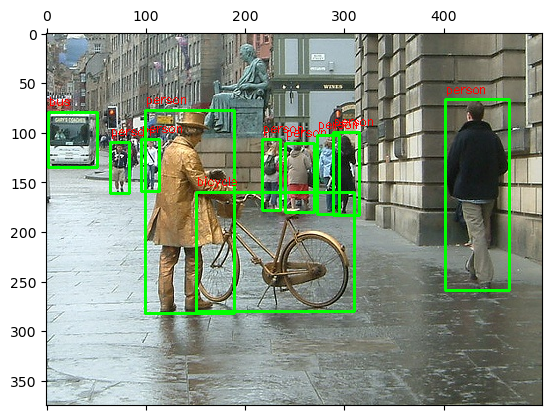

In [10]:
xml_file = os.path.join(ANNO_DIR,'2007_000793.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
print(image_name)  # 2007_000793.jpg

full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)

draw_img = img.copy()

green_color = (0,255,0)
red_color = (0,0,255)  # cv2는 BGR이므로

objects_list = []
for obj in root.findall('object'):  # 10개 반복
    xmlbox = obj.find('bndbox')

    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name = obj.find('name').text
    
    cv2.rectangle(draw_img,(left,top),(right,bottom),color=green_color,
                 thickness=2)
    cv2.putText(draw_img,class_name,(left,top - 7),
               cv2.FONT_HERSHEY_SIMPLEX,0.4,red_color,thickness=1)
    
img_rgb = cv2.cvtColor(draw_img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.matshow(img_rgb);